# SB2 Project - Data Reading

### imports & funcs

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Data
The data is stored here - https://mega.nz/folder/6EoAXKKL#xGf2l9NvyjNIrwZxKgIEww

Note you have 120 types of systems (ones with different physical attributes).
Each system was examined 5 times, in different sampling times.
That means you have ~ 600 systems to train and test on.

For each one of the 120 systems, you have a single "X_ORIG_ts_data.csv" file, containing the spectra for both componnents:

In [6]:
# Remember to change relative path if you run this

orig_ts_df = pd.read_csv(r"C:\Users\AbrahamBinnfeld\Downloads\1_ORIG_ts_data.csv")
orig_ts_df.head()

,Unnamed: 0,time_0,s_0,w_0,time_1,s_1,w_1
0,0,0.0,0.000000e+00,4990.122,1.0,-0.000000e+00,4990.122
1,1,NaN,-2.150264e-07,4990.132,NaN,-5.156168e-07,4990.132
2,2,NaN,-2.237067e-06,4990.142,NaN,-2.588191e-06,4990.142
3,3,NaN,-8.006777e-06,4990.152,NaN,-7.043793e-06,4990.152
4,4,NaN,-1.889796e-05,4990.162,NaN,-1.465388e-05,4990.162


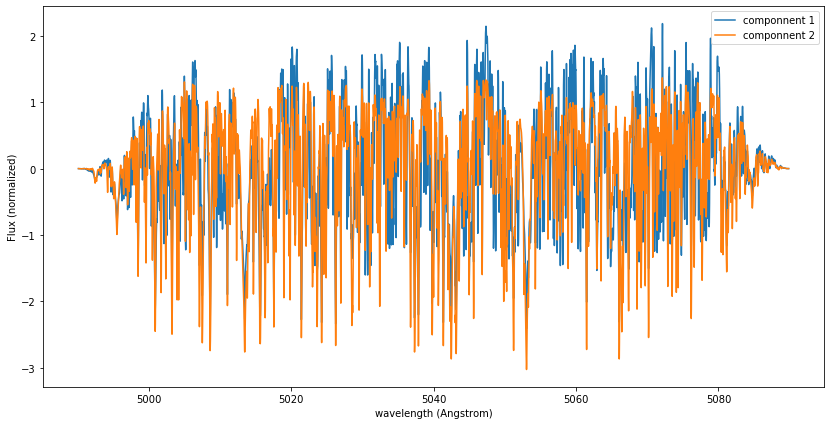

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(orig_ts_df.w_0, orig_ts_df.s_0)
plt.plot(orig_ts_df.w_1, orig_ts_df.s_1)

plt.xlabel("wavelength (Angstrom)")
plt.ylabel("Flux (normalized)")
plt.legend(["componnent 1", "componnent 2"])

Now, each one of the 5 different cases, you have the two following files:

In [18]:
ts_1_0_rv_df = pd.read_csv(r"C:\Users\AbrahamBinnfeld\Downloads\1_0_vrad_data.csv")
ts_1_0_rv_df.T.head()

,0,1,2
Unnamed: 0,vrad_1,vrad_2,time
0,-10.8583,6.94924,16.644
1,-13.4059,8.57967,50.149
2,13.2363,-8.47113,4.62581
3,3.14601,-2.01342,20.7741


In [23]:
rv_comp_1 = ts_1_0_rv_df.loc[0][1:].values
rv_comp_2 = ts_1_0_rv_df.loc[1][1:].values
obs_times = ts_1_0_rv_df.loc[2][1:].values

Now we can see the RVs plotted:

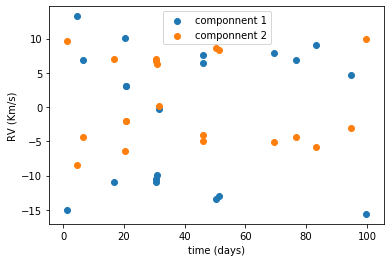

In [25]:
plt.scatter(obs_times, rv_comp_1)
plt.scatter(obs_times, rv_comp_2)

plt.xlabel("time (days)")
plt.ylabel("RV (Km/s)")
plt.legend(["componnent 1", "componnent 2"])

Or in the "folded" way:

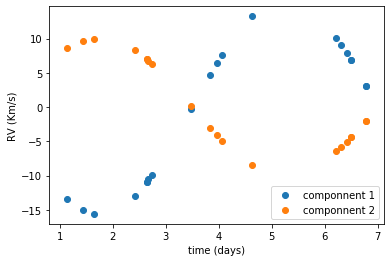

In [27]:
period = 7 # days
folded_times = [t % 7 for t in obs_times]

plt.scatter(folded_times, rv_comp_1)
plt.scatter(folded_times, rv_comp_2)

plt.xlabel("time (days)")
plt.ylabel("RV (Km/s)")
plt.legend(["componnent 1", "componnent 2"])

Cool. Noe the other file contains the actual spectrum observations corresponding to the above times and RVs:

In [30]:
ts_1_0_sp_df = pd.read_csv(r"C:\Users\AbrahamBinnfeld\Downloads\1_0_ts_data (1).csv")
ts_1_0_sp_df.head()

,Unnamed: 0,time_0,s_0,w_0,time_1,s_1,w_1,time_2,s_2,w_2,...,w_16,time_17,s_17,w_17,time_18,s_18,w_18,time_19,s_19,w_19
0,0,16.644033,0.000000e+00,4992.243559,50.148955,-0.000000e+00,4992.260935,4.625814,-0.000000e+00,4992.079222,...,4992.171154,51.417575,-0.000000e+00,4992.257505,94.838393,-0.000000e+00,4992.137625,46.070974,-0.000000e+00,4992.117241
1,1,NaN,1.601492e-09,4992.246059,NaN,5.440790e-10,4992.263435,NaN,-3.114273e-11,4992.081722,...,4992.173654,NaN,-8.553323e-10,4992.260005,NaN,2.425280e-10,4992.140125,NaN,-4.304073e-10,4992.119741
2,2,NaN,4.628305e-09,4992.248559,NaN,4.191855e-09,4992.265935,NaN,1.434880e-09,4992.084222,...,4992.176154,NaN,-1.427729e-09,4992.262505,NaN,1.857247e-09,4992.142625,NaN,1.029281e-09,4992.122241
3,3,NaN,6.447876e-09,4992.251059,NaN,1.115086e-08,4992.268435,NaN,3.485534e-09,4992.086722,...,4992.178654,NaN,-1.269607e-09,4992.265005,NaN,4.849864e-09,4992.145125,NaN,7.529220e-09,4992.124741
4,4,NaN,9.239526e-09,4992.253559,NaN,2.000958e-08,4992.270935,NaN,2.011647e-10,4992.089221,...,4992.181154,NaN,-3.749525e-09,4992.267505,NaN,7.684023e-09,4992.147625,NaN,1.727878e-08,4992.127241


For example:

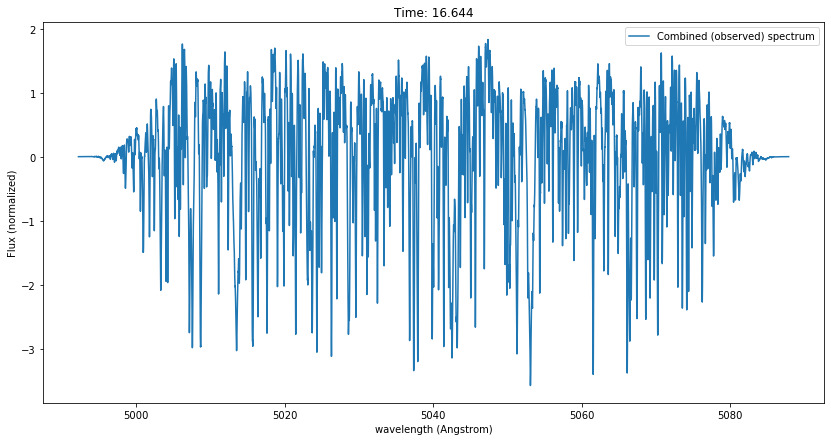

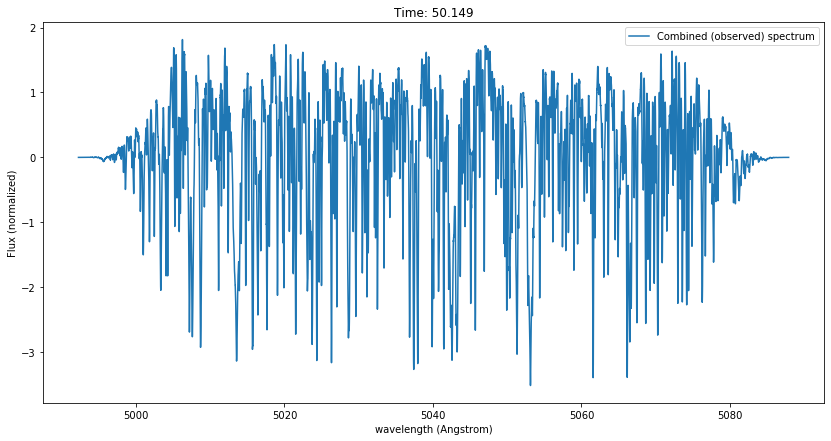

In [38]:
# observation 1 / 20
plt.figure(figsize=(14, 7))
plt.plot(ts_1_0_sp_df.w_0, ts_1_0_sp_df.s_0)

plt.title("Time: " + str(ts_1_0_sp_df.time_0[0].round(3)))
plt.xlabel("wavelength (Angstrom)")
plt.ylabel("Flux (normalized)")
plt.legend(["Combined (observed) spectrum"])

# observation 2 / 20
plt.figure(figsize=(14, 7))
plt.plot(ts_1_0_sp_df.w_1, ts_1_0_sp_df.s_1)

plt.title("Time: " + str(ts_1_0_sp_df.time_1[0].round(3)))
plt.xlabel("wavelength (Angstrom)")
plt.ylabel("Flux (normalized)")
plt.legend(["Combined (observed) spectrum"])

# ....